<a href="https://colab.research.google.com/github/snagine/PythonDSA/blob/main/Practice_Insurance_sample_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/GreatLearning/data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
l = data.columns
l

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

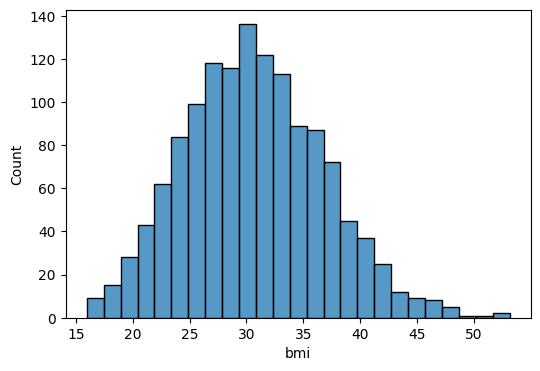

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(x='bmi',data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

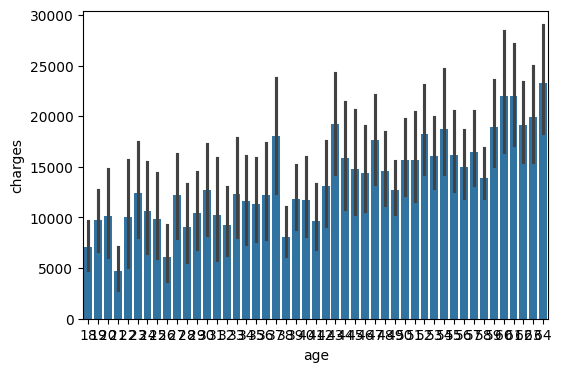

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x='age',y='charges',data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

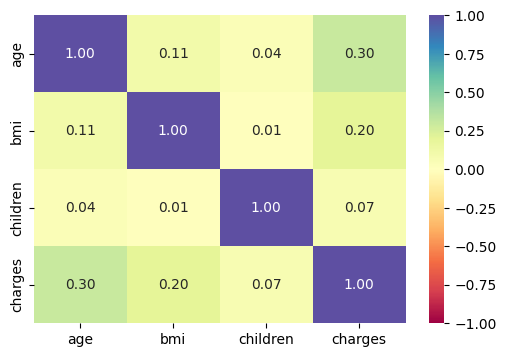

In [26]:
plt.figure(figsize=(6,4))
df2 = data.drop(columns=['sex','smoker','region'])
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show

# df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
# df.head()

In [27]:
df3 = pd.get_dummies(data, columns=['sex','smoker','region'],drop_first=True)
df3

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [9]:
# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error

In [32]:
X = data.drop(["bmi","smoker","region"], axis=1)
y = data["age"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)
X_test.shape

(402, 4)

NameError: name 'sm' is not defined

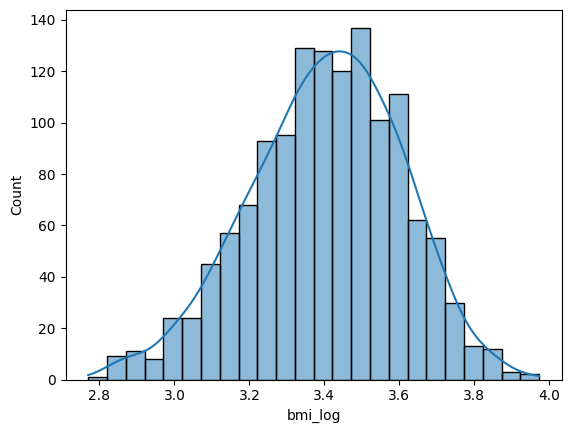

In [12]:
df = pd.get_dummies(data, columns=['sex','smoker','region'], drop_first=True)
df.head()

df['bmi_log'] = np.log(data.bmi)
sns.histplot(data=df, x='bmi_log', kde=True)

X = df.drop(['charges', 'bmi_log'],axis=1)
X = sm.add_constant(X)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

x_test.shape
lr_sklearn.score(x_train, y_train)


In [33]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
lr_sklearn = LinearRegression()
lr_sklearn.fit(x_train, y_train)

# Print the model intercept
print("Intercept:", lr_sklearn.intercept_)

ValueError: could not convert string to float: 'male'

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model



poly = PolynomialFeatures(degree=2, interaction_only=True)

X_train2 = poly.fit_transform(x_train)

X_test2 = poly.fit_transform(x_test)



poly_clf = linear_model.LinearRegression()



poly_clf.fit(X_train2, y_train)



#In sample (training) R^2 will always improve with the number of variables!

print(poly_clf.score(X_train2, y_train))

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicting on the test set
y_pred = lr_sklearn.predict(x_test)

#calculating MAE
mean_absolute_error(y_test, y_pred)

In [ ]:
#Out off sample (testing) R^2
print(poly_clf.score(X_test2, y_test))